In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

In [2]:
# Specify the filename for the .pkl file
filename = "collision_stats.pkl"
# Load the dictionary back from the .pkl file
with open(filename, "rb") as f:
    stats = pickle.load(f)

In [3]:
iterations = list(stats.keys())
all_methods = list(stats[0].keys())
percentages = list(stats[0]['FES'].keys())
metrics = list(stats[0]['FES'][1.0].keys())

In [4]:
median_stats = {}
for method_key in all_methods:
    median_stats[method_key] = {}
    for percentage_key in percentages:
        median_stats[method_key][percentage_key] = {}
        for metric_key in metrics:
            median_stats[method_key][percentage_key][metric_key] = np.median([stats[iter][method_key][percentage_key][metric_key] for iter in iterations])

## How does the reduction affects the efficiency?

In [5]:
time_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        time_df.loc[m][p] = round(median_stats[m][p]['time'],2)
time_df_t = time_df.transpose()
time_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,59.68,153.03,70.76,72.62,60.76,276.12
0.2,119.73,221.47,138.94,142.89,121.15,311.98
0.3,179.33,305.67,209.66,212.18,181.22,349.14
0.4,238.67,368.85,275.61,279.7,240.73,390.32
0.5,296.24,440.14,342.89,344.82,298.63,427.5
0.6,358.38,506.34,407.13,398.71,357.88,462.85
0.7,414.35,568.4,463.99,468.55,413.52,500.52
0.8,472.5,649.97,536.28,534.12,474.81,539.93
0.9,533.91,731.77,593.33,597.94,536.11,578.62
1.0,592.48,592.78,591.3,593.0,592.48,592.48


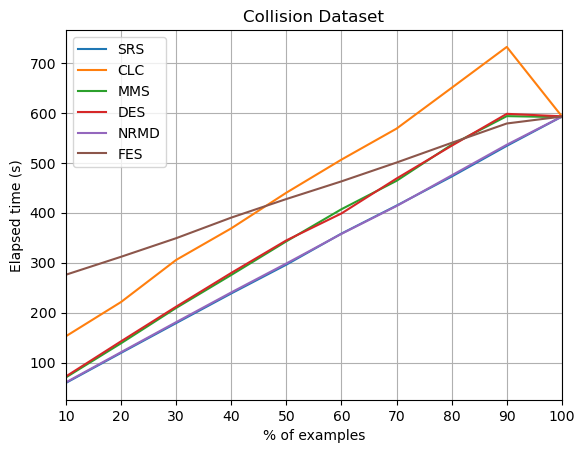

In [6]:
for idx, row in time_df.iterrows():
    plt.plot(time_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Elapsed time (s)')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

In [7]:
carbon_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        carbon_df.loc[m][p] = round(median_stats[m][p]['carbon'] * 1000,3)
carbon_df_t = carbon_df.transpose()
carbon_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.263,0.556,0.3,0.308,0.267,1.028
0.2,0.474,0.797,0.546,0.558,0.479,1.155
0.3,0.683,1.125,0.787,0.802,0.691,1.291
0.4,0.897,1.331,1.027,1.043,0.881,1.438
0.5,1.105,1.572,1.262,1.254,1.11,1.558
0.6,1.315,1.83,1.45,1.452,1.319,1.655
0.7,1.476,2.07,1.703,1.677,1.514,1.779
0.8,1.713,2.344,1.946,1.945,1.728,1.967
0.9,1.943,2.636,2.156,2.17,1.947,2.098
1.0,2.146,2.146,2.146,2.146,2.146,2.146


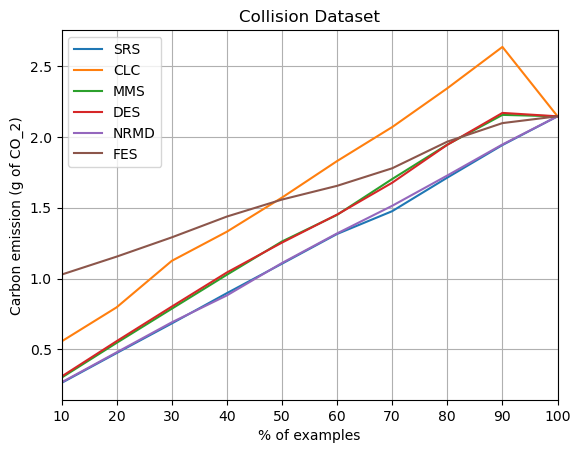

In [8]:
for idx, row in carbon_df.iterrows():
    plt.plot(carbon_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Carbon emission (g of CO_2)')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

## How $\varepsilon$-representative are the reduced datasets?

In [9]:
epsilon_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        epsilon_df.loc[m][p] = round(median_stats[m][p]['epsilon'],3)
epsilon_df_t = epsilon_df.transpose()
epsilon_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.611,0.55,0.403,0.628,0.959,0.823
0.2,0.56,0.485,0.37,0.6,0.948,0.823
0.3,0.55,0.464,0.333,0.561,0.944,0.6
0.4,0.533,0.438,0.309,0.546,0.931,0.586
0.5,0.533,0.439,0.292,0.533,0.891,0.573
0.6,0.533,0.395,0.273,0.533,0.82,0.573
0.7,0.461,0.394,0.261,0.511,0.754,0.474
0.8,0.457,0.353,0.242,0.465,0.726,0.474
0.9,0.433,0.31,0.228,0.433,0.612,0.398
1.0,0.0,0.0,0.0,0.0,0.0,0.0


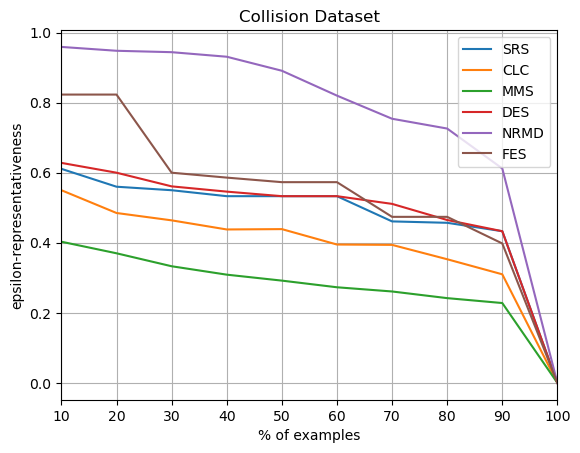

In [10]:
for idx, row in epsilon_df.iterrows():
    plt.plot(epsilon_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('epsilon-representativeness')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

## How does the reduction affect the performance?

In [11]:
accuracy_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        accuracy_df.loc[m][p] = round(median_stats[m][p]['acc'],3)
accuracy_df_t = accuracy_df.transpose()
accuracy_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.88,0.883,0.851,0.892,0.821,0.583
0.2,0.896,0.886,0.875,0.902,0.84,0.74
0.3,0.895,0.891,0.89,0.906,0.854,0.807
0.4,0.905,0.904,0.896,0.908,0.865,0.896
0.5,0.905,0.906,0.899,0.908,0.859,0.918
0.6,0.908,0.901,0.909,0.912,0.875,0.915
0.7,0.912,0.912,0.904,0.911,0.893,0.916
0.8,0.909,0.911,0.911,0.913,0.905,0.919
0.9,0.912,0.911,0.907,0.912,0.906,0.918
1.0,0.91,0.91,0.91,0.91,0.91,0.91


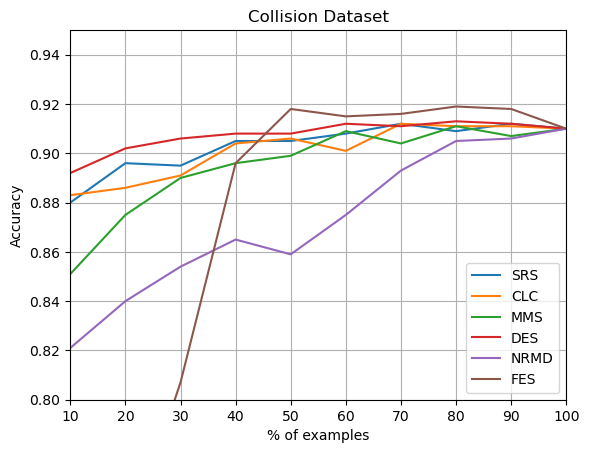

In [12]:
for idx, row in accuracy_df.iterrows():
    plt.plot(accuracy_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Accuracy')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.80,0.95)
plt.grid()
plt.legend()
plt.show()

In [15]:
precision_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        precision_df.loc[m][p] = round(median_stats[m][p]['pre_avg'],3)
precision_df_t = precision_df.transpose()
precision_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.865,0.869,0.848,0.88,0.815,0.564
0.2,0.883,0.871,0.869,0.898,0.836,0.776
0.3,0.881,0.876,0.878,0.898,0.851,0.82
0.4,0.893,0.891,0.881,0.905,0.862,0.902
0.5,0.896,0.895,0.885,0.897,0.845,0.914
0.6,0.897,0.888,0.899,0.901,0.86,0.903
0.7,0.902,0.901,0.89,0.902,0.88,0.912
0.8,0.898,0.901,0.899,0.9,0.892,0.915
0.9,0.9,0.903,0.895,0.902,0.895,0.913
1.0,0.901,0.901,0.901,0.901,0.901,0.901


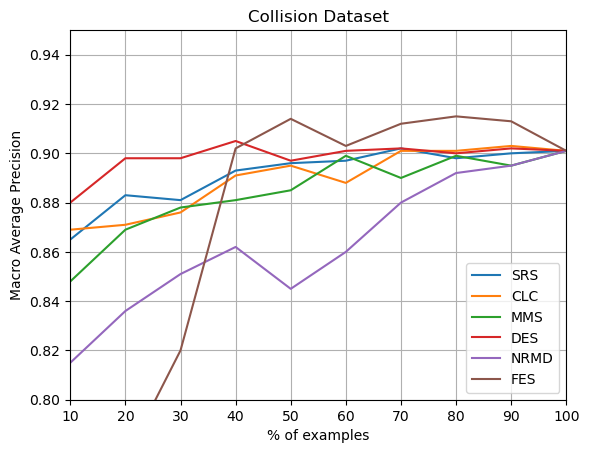

In [16]:
for idx, row in precision_df.iterrows():
    plt.plot(precision_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average Precision')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.80,0.95)
plt.grid()
plt.legend()
plt.show()

In [19]:
recall_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        recall_df.loc[m][p] = round(median_stats[m][p]['rec_avg'],3)
recall_df_t = recall_df.transpose()
recall_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.882,0.882,0.843,0.889,0.784,0.534
0.2,0.895,0.895,0.879,0.891,0.805,0.72
0.3,0.898,0.898,0.886,0.896,0.825,0.752
0.4,0.904,0.903,0.902,0.898,0.841,0.869
0.5,0.9,0.907,0.905,0.905,0.864,0.909
0.6,0.905,0.908,0.906,0.909,0.879,0.918
0.7,0.907,0.908,0.905,0.905,0.894,0.901
0.8,0.907,0.909,0.909,0.906,0.902,0.907
0.9,0.909,0.906,0.912,0.908,0.908,0.91
1.0,0.908,0.908,0.908,0.908,0.908,0.908


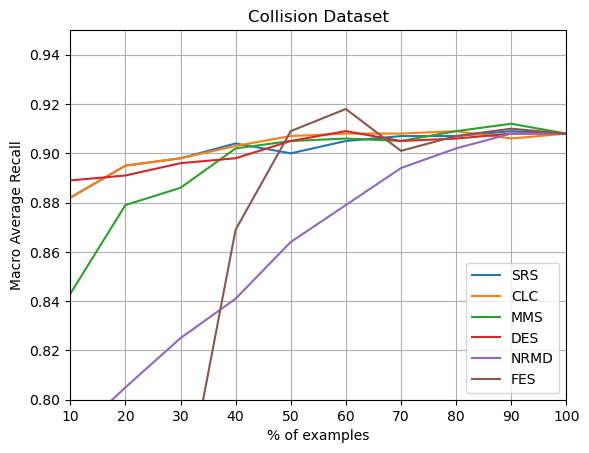

In [20]:
for idx, row in recall_df.iterrows():
    plt.plot(recall_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average Recall')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.80,0.95)
plt.grid()
plt.legend()
plt.show()

In [23]:
f1score_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        f1score_df.loc[m][p] = round(median_stats[m][p]['f1_avg'],3)
f1score_df_t = f1score_df.transpose()
f1score_df_t

,SRS,CLC,MMS,DES,NRMD,FES
0.1,0.871,0.875,0.83,0.882,0.795,0.562
0.2,0.887,0.879,0.868,0.891,0.816,0.713
0.3,0.887,0.885,0.879,0.897,0.835,0.768
0.4,0.898,0.897,0.889,0.899,0.847,0.882
0.5,0.895,0.899,0.892,0.902,0.85,0.909
0.6,0.901,0.895,0.903,0.904,0.865,0.908
0.7,0.904,0.905,0.898,0.903,0.884,0.907
0.8,0.901,0.903,0.903,0.905,0.897,0.911
0.9,0.904,0.904,0.901,0.905,0.9,0.911
1.0,0.904,0.904,0.904,0.904,0.904,0.904


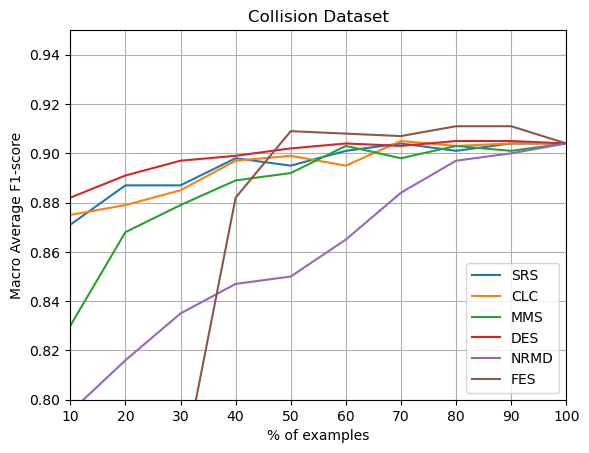

In [24]:
for idx, row in f1score_df.iterrows():
    plt.plot(f1score_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average F1-score')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.80,0.95)
plt.grid()
plt.legend()
plt.show()

## Does the $\varepsilon$-representativeness affect the performance?

In [25]:
epsilon_acc_df = pd.DataFrame(index=['rho', 'p-value'], columns=percentages[:-1])
for p in percentages[:-1]:
    epsilon_values = []
    accuracy_values = []
    for iter in iterations:
        for m in all_methods:
            epsilon_values.append(stats[iter][m][p]['epsilon'])
            accuracy_values.append(stats[iter][m][p]['acc'])
    rho, pvalue = spearmanr(epsilon_values, accuracy_values)
    epsilon_acc_df.loc['rho'][p], epsilon_acc_df.loc['p-value'][p] = round(rho,2), round(pvalue,2)
epsilon_acc_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
rho,-0.38,-0.42,-0.42,-0.28,-0.19,-0.17,-0.18,-0.07,-0.14
p-value,0.0,0.0,0.0,0.03,0.15,0.19,0.16,0.58,0.28


In [26]:
epsilon_f1_df = pd.DataFrame(index=['rho', 'p-value'], columns=percentages[:-1])
for p in percentages[:-1]:
    epsilon_values = []
    f1_values = []
    for iter in iterations:
        for m in all_methods:
            epsilon_values.append(stats[iter][m][p]['epsilon'])
            f1_values.append(stats[iter][m][p]['f1_avg'])
    rho, pvalue = spearmanr(epsilon_values, f1_values)
    epsilon_f1_df.loc['rho'][p], epsilon_f1_df.loc['p-value'][p] = round(rho,2), round(pvalue,2)
epsilon_f1_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
rho,-0.38,-0.43,-0.42,-0.39,-0.22,-0.15,-0.19,-0.07,-0.14
p-value,0.0,0.0,0.0,0.0,0.1,0.24,0.14,0.58,0.3
